# Exploratory Data Analysis Household Pulse Survey

In this section, we extract data to use directly with mobility trends by states and cities:

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df1 = pd.read_csv('../data/interim/census/household_shopping1.csv')
df2 = pd.read_csv('../data/interim/census/household_shopping2.csv')
df3 = pd.read_csv('../data/interim/census/household_shopping3.csv')
df4 = pd.read_csv('../data/interim/census/household_shopping4.csv')
df5 = pd.read_csv('../data/interim/census/household_shopping5.csv')
df6 = pd.read_csv('../data/interim/census/household_shopping6.csv')
df7 = pd.read_csv('../data/interim/census/household_shopping7.csv')
df8 = pd.read_csv('../data/interim/census/household_shopping8.csv')

In [3]:
df1.replace({-99: np.nan, -88: np.nan}, inplace=True)
df2.replace({-99: np.nan, -88: np.nan}, inplace=True)
df3.replace({-99: np.nan, -88: np.nan}, inplace=True)
df4.replace({-99: np.nan, -88: np.nan}, inplace=True)
df5.replace({-99: np.nan, -88: np.nan}, inplace=True)
df6.replace({-99: np.nan, -88: np.nan}, inplace=True)
df7.replace({-99: np.nan, -88: np.nan}, inplace=True)
df8.replace({-99: np.nan, -88: np.nan}, inplace=True)

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
#df_scram drops the duplicates
df_scram = df.drop_duplicates()

In [5]:
print('Original size: {}'.format(df.shape))
print('Size dropping duplicates: {}'.format(df_scram.shape))

Original size: (705844, 44)
Size dropping duplicates: (705844, 44)


Defining useful functions:

In [6]:
def generation_(TBIRTH_YEAR):
# Function to determine generation by birthday year. 
# According to the survey, all persons born before 2002.
    if TBIRTH_YEAR in list(range(1946, 1955)):
        return 'Baby Boomer'
    elif TBIRTH_YEAR in list(range(1955, 1965)):
        return 'Generation Jones'
    elif TBIRTH_YEAR in list(range(1965, 1981)):
        return 'Generation X'
    elif TBIRTH_YEAR in list(range(1981, 1997)):
        return 'Millennials'
    elif TBIRTH_YEAR in list(range(1997, 2010)):
        return 'Generation Z'
    else:
        return 'Silent Generation'

In [7]:
def get_rctable(var1, var2, df):
    res = pd.crosstab(df[var2], df[var1])
    chi2, p, dof, ex = chi2_contingency(res)
    output = round( res.div(res.sum(axis = 1),axis = 0)*100, 2 )
    return output.style.set_caption(f'{var1} vs. {var2}: Chi-square p-value={p:.5f}')

In [8]:
def get_rct(var1, var2, df):
    res = pd.crosstab(df[var2], df[var1])
    output = round( res.div(res.sum(axis = 1),axis = 0)*100, 2 )
    return output

In [9]:
def add_dates_start_end_inplace(data):
    data['DATE_START'] = data['WEEK'].apply(lambda idx: dates_from_weeks[idx][0])
    data['DATE_END']   = data['WEEK'].apply(lambda idx: dates_from_weeks[idx][1])
    return data

#### Legends by demographic variables

In [10]:
race = ['White', 
              'Black', 
              'Asian',
              'Other']

educ = ['Less than \nhigh school', 
               'Some high \nschool',
               'High school',
               'Some college',
               'Associate',
               'Bachelor',
               'Graduate']

marital = ['Married',
                  'Widowed',
                  'Divorced',
                  'Separated',
                  'Never married']

region = ['Northeast', 
          'South', 
          'Midwest', 
          'West']

diff_expnd = ['Not at all',
              'A little', 
              'Somewhat',
              'Very']

generation = ['Silent \nGeneration',
              'Baby \nBoomer',
              'Generation \nJones',
              'Generation X',
              'Generation Z',
              'Millennials']


msa = { '35620': 'New York-Newark-Jersey City',
        '31080': 'Los Angeles-Long Beach-Anaheim',
        '16980': 'Chicago-Naperville-Elgin',
        '19100': 'Dallas-Fort Worth-Arlington',
        '26420': 'Houston-The Woodlands-Sugar Land',
        '47900': 'Washington-Arlington-Alexandria',
        '33100': 'Miami-Fort Lauderdale-Pompano Beach',
        '37980': 'Philadelphia-Camden-Wilmington',
        '12060': 'Atlanta-Sandy Springs-Alpharetta',
        '38060': 'Phoenix-Mesa-Chandler',
        '14460': 'Boston-Cambridge-Newton',
        '41860': 'San Francisco-Oakland-Berkeley',
        '40140': 'Riverside-San Bernardino-Ontario',
        '19820': 'Detroit-Warren-Dearborn',
        '42660': 'Seattle-Tacoma-Bellevue'}

dates_from_weeks = {
     1: ('2020-04-23', '2020-05-05'),
     2: ('2020-05-07', '2020-05-12'),
     3: ('2020-05-14', '2020-05-19'),
     4: ('2020-05-21', '2020-05-26'),
     5: ('2020-05-28', '2020-06-02'),
     6: ('2020-06-04', '2020-06-09'),
     7: ('2020-06-11', '2020-06-16'),
     8: ('2020-06-18', '2020-06-23'),
     9: ('2020-06-25', '2020-06-30'),
    10: ('2020-07-02', '2020-07-07'),
    11: ('2020-07-09', '2020-07-14'),
    12: ('2020-07-16', '2020-07-21'),
    13: ('2020-08-19', '2020-08-31'),
    14: ('2020-09-02', '2020-09-14'),
    15: ('2020-09-16', '2020-09-28'),
    16: ('2020-09-30', '2020-10-12'),
    17: ('2020-10-14', '2020-10-26'),
    18: ('2020-10-28', '2020-11-09'),
    19: ('2020-11-11', '2020-11-23'),
    20: ('2020-11-25', '2020-12-07')    
}

In [11]:
df = add_dates_start_end_inplace(df)

In [12]:
df.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME,DATE_START,DATE_END
0,V130000001S12010403200123,13.0,48.0,19100.0,2.0,1989.0,1.0,1.0,1.0,6.0,...,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,2020-08-19,2020-08-31
1,V130000001S34010154300113,13.0,1.0,NaN,2.0,1988.0,2.0,1.0,1.0,5.0,...,NaN,1.0,NaN,2.0,3.0,1.0,2.0,6.0,2020-08-19,2020-08-31
2,V130000001S37010241600123,13.0,1.0,NaN,2.0,1969.0,1.0,2.0,2.0,4.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,7.0,2020-08-19,2020-08-31
3,V130000001S37010645600123,13.0,1.0,NaN,2.0,1947.0,1.0,1.0,1.0,7.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,6.0,2020-08-19,2020-08-31
4,V130000001S70011963510113,13.0,1.0,NaN,2.0,1968.0,2.0,1.0,2.0,6.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,2020-08-19,2020-08-31


### 1. Nationwide correlation between the behavioral variables 

In [13]:
customer_behavior_df = df.loc[:, ['CHNGHOW1', 'CHNGHOW2', 'CHNGHOW3', 'CHNGHOW4', 'CHNGHOW5', 'CHNGHOW6', 'CHNGHOW7']]
customer_behavior_df.replace({np.nan: 0}).corr()

,CHNGHOW1,CHNGHOW2,CHNGHOW3,CHNGHOW4,CHNGHOW5,CHNGHOW6,CHNGHOW7
CHNGHOW1,1.000000,0.392752,-0.137341,0.401545,-0.030428,0.401412,0.080863
CHNGHOW2,0.392752,1.000000,-0.097829,0.282151,-0.016054,0.286316,0.016210
CHNGHOW3,-0.137341,-0.097829,1.000000,0.006890,0.128430,-0.006211,0.158587
CHNGHOW4,0.401545,0.282151,0.006890,1.000000,-0.066495,0.329518,0.068815
CHNGHOW5,-0.030428,-0.016054,0.128430,-0.066495,1.000000,0.051572,0.044058
CHNGHOW6,0.401412,0.286316,-0.006211,0.329518,0.051572,1.000000,-0.282539
CHNGHOW7,0.080863,0.016210,0.158587,0.068815,0.044058,-0.282539,1.000000


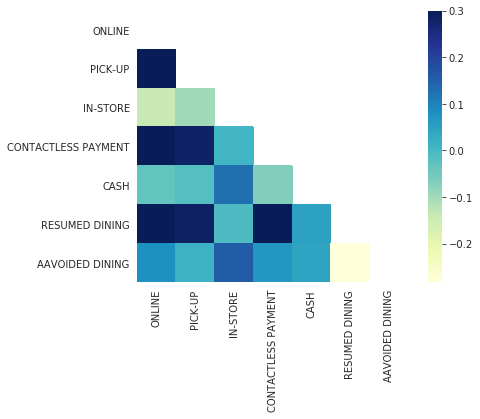

In [14]:
corr = customer_behavior_df.replace({np.nan: 0}).corr()
xticklabels = ['ONLINE', 'PICK-UP', 'IN-STORE', 'CONTACTLESS PAYMENT', 'CASH', 'RESUMED DINING', 'AAVOIDED DINING']
yticklabels = ['ONLINE', 'PICK-UP', 'IN-STORE', 'CONTACTLESS PAYMENT', 'CASH', 'RESUMED DINING', 'AAVOIDED DINING']
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="YlGnBu", xticklabels=xticklabels, yticklabels=yticklabels)

Using the surveyed samples across the weeks 13th-20th of the Household Survey, we find some interesting patterns:
- As expected, CHNGHOW1 (online purchase method) is highly correlated to CHNGHOW2 (curbside pick-up, since both methods don't require in-store purchases), to CHNGHOW4 (contactless payment methods), but also, interestingly high correlated to CHNGHOW6 (resumed eating at restaurants). 
- As opposite, CHNGHOW3 (people doing more purchases in-store puchase) and at the same time increasing the use of cash as payment method (CHNGHOW5) are avoiding eating at restaurants CHNGHOW7. In fact, CHNGHOW7 reveals low correlation with all the rest of customer behaviors variables, except by CHNGHOW3 and CHNGHOW5.

Why does this happen?

The Household Survey asks people about changes in their buying patterns, without necessarily revealing the intrinsic preferences of the respondents or those they have adopted based on their personal circumstances. The use of cash or purchases in physical stores imply greater exposure and risk of contagion. Health authorities have emphasized the need to avoid exposures of this type, and nevertheless, the differences between generations continue to keep age groups away from technology and alternatives that allow them to interact with the market without risk. This would explain, for example, why people who are exposed to the use of cash or purchases in physical stores have avoided going back to dining in restaurants, while other less exposed groups are more willing to resume dining in restaurants.

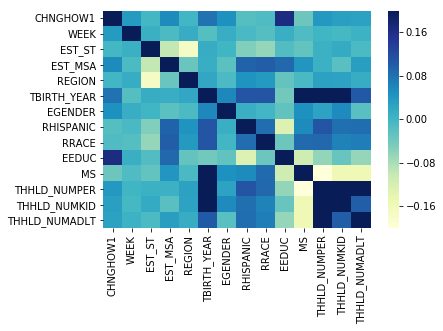

In [15]:
demographics = df.columns[0:14]
corr = df.loc[:, ['CHNGHOW1']+ list(demographics)].replace({np.nan: 0}).corr()
_ = sns.heatmap(corr, vmin=-0.2, vmax=0.2, cmap="YlGnBu")

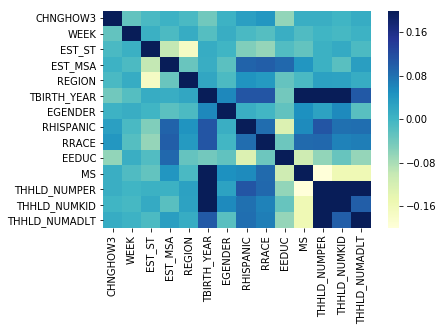

In [16]:
corr = df.loc[:, ['CHNGHOW3']+ list(demographics)].replace({np.nan: 0}).corr()
_ = sns.heatmap(corr, vmin=-0.2, vmax=0.2, cmap="YlGnBu")

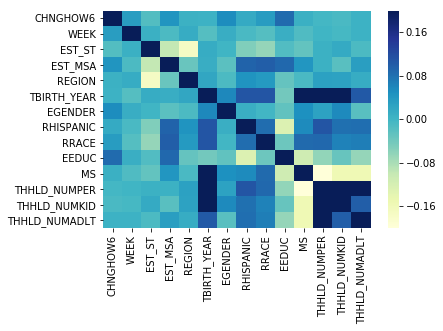

In [17]:
corr = df.loc[:, ['CHNGHOW6']+ list(demographics)].replace({np.nan: 0}).corr()
_ = sns.heatmap(corr, vmin=-0.2, vmax=0.2, cmap="YlGnBu")

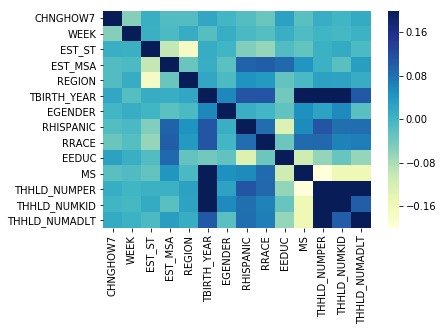

In [18]:
corr = df.loc[:, ['CHNGHOW7']+ list(demographics)].replace({np.nan: 0}).corr()
_ = sns.heatmap(corr, vmin=-0.2, vmax=0.2, cmap="YlGnBu")

## 2. Display Results for a specific city

In [19]:
def shopping_behaviors_correlation(df, location, name_location):
    corr = df[df.EST_MSA == location].loc[:, ['CHNGHOW1', 'CHNGHOW2', 'CHNGHOW3', 'CHNGHOW4', 
                                              'CHNGHOW5', 'CHNGHOW6', 'CHNGHOW7']].replace({np.nan: 0}).corr()
    xticklabels = ['ONLINE', 'PICK-UP', 'IN-STORE', 'CONTACTLESS PAYMENT', 'CASH', 
                   'RESUMED DINING', 'AVOIDED DINING']
    yticklabels = ['ONLINE', 'PICK-UP', 'IN-STORE', 'CONTACTLESS PAYMENT', 'CASH', 
                   'RESUMED DINING', 'AVOIDED DINING']
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(8.5, 8.5))
        ax = sns.heatmap(corr, 
                         mask=mask, 
                         vmax=.3, 
                         square=True, 
                         cmap="coolwarm_r", 
                         xticklabels=xticklabels, 
                         yticklabels=yticklabels, 
                         annot=True, 
                         fmt='1.3f')
        
    _ = plt.title('Correlation Shopping Behavior variables\n'+name_location, size=16)

In [20]:
def cross_variable_correlation(df, location, shopping_variable, name_variable, name_location):
    l = ['SCRAM', 'WEEK', 'TBIRTH_YEAR', 'EGENDER', 'RHISPANIC', 'RRACE', 
         'EEDUC', 'MS', 'THHLD_NUMPER', 'THHLD_NUMKID', 'THHLD_NUMADLT']

    corr = df[df.EST_MSA == location].loc[:, [shopping_variable] + l].replace({np.nan: 0}).corr()
    corr['ABS_CHNGHOW'] = abs(corr[shopping_variable])
    varsx = list(corr['ABS_CHNGHOW'][1:].sort_values(ascending=False)[:3].index)

    print('Variables more correlated to '+name_variable+': \n{}'.format(corr.loc[varsx, :][shopping_variable]))
    
    #_ = sns.heatmap(corr, vmin=-0.2, vmax=0.2, cmap="YlGnBu")
    #_ = plt.show()
    corr.drop(columns=['ABS_CHNGHOW'], inplace=True)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="coolwarm_r", annot=True, fmt='1.2f')
        _ = plt.title('Correlation Demographics and '+name_variable+'\n'+name_location, size=16)

Variables more correlated to Online Purchase: 
EEDUC          0.134592
TBIRTH_YEAR    0.101085
RHISPANIC     -0.052207
Name: CHNGHOW1, dtype: float64


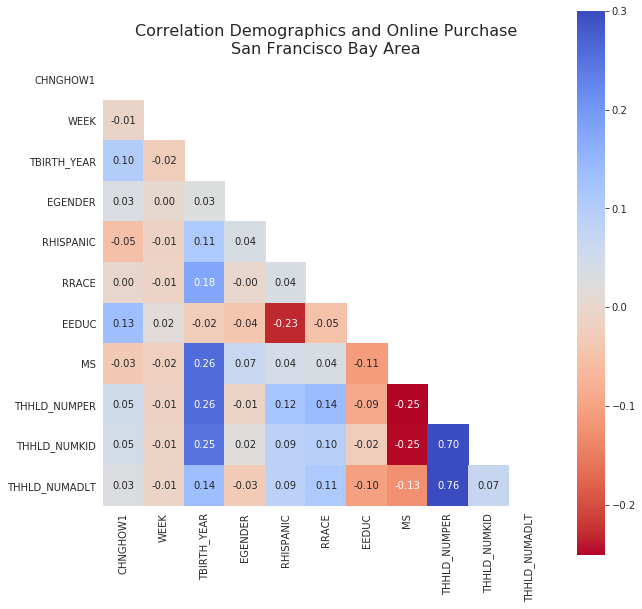

In [21]:
cross_variable_correlation(df, 41860, 'CHNGHOW1', 'Online Purchase', 'San Francisco Bay Area')

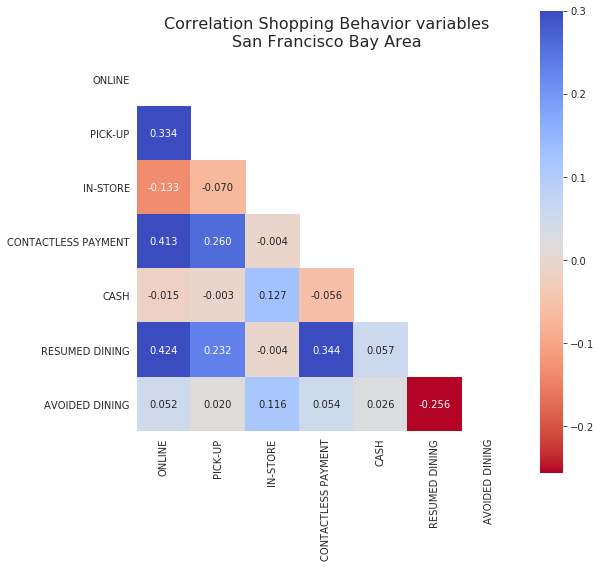

In [22]:
shopping_behaviors_correlation(df, 41860, 'San Francisco Bay Area')

In [23]:
x = df.loc[:, ['CHNGHOW1', 'CHNGHOW2', 'CHNGHOW3']].idxmax(axis=1)
df['PURCHASE'] = x

In [24]:
x = df.loc[:, ['CHNGHOW4', 'CHNGHOW5']].idxmax(axis=1)
df['PAYMENT'] = x

In [25]:
x = df.loc[:, ['CHNGHOW6', 'CHNGHOW7']].idxmax(axis=1)
df['RESTAURANTS'] = x

In [26]:
df_valid = df.loc[:, list(demographics) + ['PURCHASE','PAYMENT','RESTAURANTS','GENERATION','DATE_START','DATE_END']].reindex()
#df_valid = df_purchase.dropna(subset=['PURCHASE'])
df_valid.info()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 705844 entries, 0 to 72483
Data columns (total 20 columns):
SCRAM            705844 non-null object
WEEK             705844 non-null float64
EST_ST           705844 non-null float64
EST_MSA          222704 non-null float64
REGION           705844 non-null float64
TBIRTH_YEAR      705844 non-null float64
EGENDER          705844 non-null float64
RHISPANIC        705844 non-null float64
RRACE            705844 non-null float64
EEDUC            705844 non-null float64
MS               699458 non-null float64
THHLD_NUMPER     705844 non-null float64
THHLD_NUMKID     705844 non-null float64
THHLD_NUMADLT    705844 non-null float64
PURCHASE         431117 non-null object
PAYMENT          275515 non-null object
RESTAURANTS      446694 non-null object
GENERATION       0 non-null float64
DATE_START       705844 non-null object
DATE_END         705844 non-null object
dtypes: float64(14), object(6)
memory usage: 113.1+ MB


In [27]:
a = df_valid.groupby(['WEEK','EST_MSA','PURCHASE']).count().reset_index().loc[:, ['WEEK','EST_MSA','PURCHASE','SCRAM']].rename(columns={'SCRAM':'COUNTS_PURCHASE'})
b = df_valid.groupby(['WEEK','EST_MSA','PAYMENT']).count().reset_index().loc[:,['WEEK','EST_MSA','PAYMENT', 'SCRAM']].rename(columns={'SCRAM':'COUNTS_PAYMENT'})
c = df_valid.groupby(['WEEK','EST_MSA','RESTAURANTS']).count().reset_index().loc[:, ['WEEK','EST_MSA','RESTAURANTS','SCRAM']].rename(columns={'SCRAM':'COUNTS_RESTAURANTS'})

In [28]:
df_valid.groupby(['WEEK','EST_MSA','PURCHASE']).count()

SCRAM  EST_ST  REGION  TBIRTH_YEAR  EGENDER  RHISPANIC  \
WEEK EST_MSA PURCHASE                                                           
13.0 12060.0 CHNGHOW1   1075    1075    1075         1075     1075       1075   
             CHNGHOW2     87      87      87           87       87         87   
             CHNGHOW3    108     108     108          108      108        108   
     14460.0 CHNGHOW1   1533    1533    1533         1533     1533       1533   
             CHNGHOW2     92      92      92           92       92         92   
             CHNGHOW3    131     131     131          131      131        131   
     16980.0 CHNGHOW1   1244    1244    1244         1244     1244       1244   
             CHNGHOW2     80      80      80           80       80         80   
             CHNGHOW3    140     140     140          140      140        140   
     19100.0 CHNGHOW1   1098    1098    1098         1098     1098       1098   
             CHNGHOW2    126     126     126          126      126        126   
             CHNGHOW3    124     124     124          124      124        124   
     19820.0 CHNGHOW1    738     738     738          738      738        738   
             CHNGHOW2     70      70      70           70       70         70   
             CHNGHOW3    103     103     103          103      103        103   
     26420.0 CHNGHOW1    939     939     939          939      939        939   
             CHNGHOW2    112     112     112          112      112        112   
             CHNGHOW3    113     113     113          113      113        113   
     31080.0 CHNGHOW1   1536    1536    1536         1536     1536       1536   
             CHNGHOW2    100     100     100          100      100        100   
             CHNGHOW3    112     112     112          112      112        112   
     33100.0 CHNGHOW1    850     850     850          850      850        850   
             CHNGHOW2     61      61      61           61       61         61   
             CHNGHOW3     93      93      93           93       93         93   
     35620.0 CHNGHOW1   1669    1669    1669         1669     1669       1669   
             CHNGHOW2     84      84      84           84       84         84   
             CHNGHOW3    190     190     190          190      190        190   
     37980.0 CHNGHOW1   1537    1537    1537         1537     1537       1537   
             CHNGHOW2     88      88      88           88       88         88   
             CHNGHOW3    155     155     155          155      155        155   
...                      ...     ...     ...          ...      ...        ...   
20.0 26420.0 CHNGHOW1    657     657     657          657      657        657   
             CHNGHOW2     64      64      64           64       64         64   
             CHNGHOW3     49      49      49           49       49         49   
     31080.0 CHNGHOW1   1036    1036    1036         1036     1036       1036   
             CHNGHOW2     44      44      44           44       44         44   
             CHNGHOW3     41      41      41           41       41         41   
     33100.0 CHNGHOW1    552     552     552          552      552        552   
             CHNGHOW2     30      30      30           30       30         30   
             CHNGHOW3     52      52      52           52       52         52   
     35620.0 CHNGHOW1   1086    1086    1086         1086     1086       1086   
             CHNGHOW2     42      42      42           42       42         42   
             CHNGHOW3     60      60      60           60       60         60   
     37980.0 CHNGHOW1   1105    1105    1105         1105     1105       1105   
             CHNGHOW2     65      65      65           65       65         65   
             CHNGHOW3     57      57      57           57       57         57   
     38060.0 CHNGHOW1    770     770     770          770      770        770   
             CHNGHOW2     47      47      47          

In [29]:
a.head()

,WEEK,EST_MSA,PURCHASE,COUNTS_PURCHASE
0,13.0,12060.0,CHNGHOW1,1075
1,13.0,12060.0,CHNGHOW2,87
2,13.0,12060.0,CHNGHOW3,108
3,13.0,14460.0,CHNGHOW1,1533
4,13.0,14460.0,CHNGHOW2,92


In [30]:
a1 = a.set_index(["WEEK", "EST_MSA", 'PURCHASE'])['COUNTS_PURCHASE'].unstack().reset_index()
b1 = b.set_index(["WEEK", "EST_MSA", 'PAYMENT'])['COUNTS_PAYMENT'].unstack().reset_index()
c1 = c.set_index(["WEEK", "EST_MSA", 'RESTAURANTS'])['COUNTS_RESTAURANTS'].unstack().reset_index()

In [31]:
d = a1.merge(b1).merge(c1)

In [32]:
#d

In [33]:
temp1 = pd.crosstab(df_valid.DATE_START, [df_valid.RESTAURANTS, df_valid.EST_MSA])
temp2 = round(temp1.div(temp1.sum(axis = 1),axis = 0)*100, 2).pct_change().cumsum()
temp2 = temp2.reset_index()

In [34]:
temp2.columns[13]

('CHNGHOW6', 41860.0)

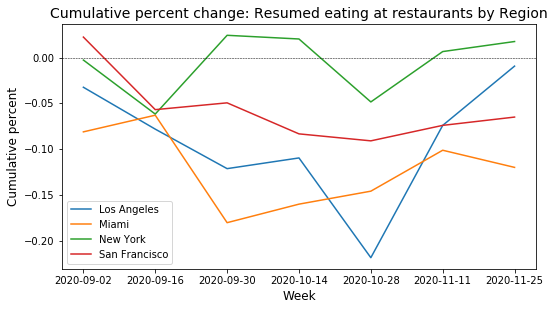

In [35]:
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y=temp2.columns[7], x='DATE_START', data=temp2, label='Los Angeles')
_ = sns.lineplot(y=temp2.columns[8], x='DATE_START', data=temp2, label='Miami')
_ = sns.lineplot(y=temp2.columns[9], x='DATE_START', data=temp2, label='New York')
_ = sns.lineplot(y=temp2.columns[13], x='DATE_START', data=temp2, label='San Francisco')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent change: Resumed eating at restaurants by Region', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

In [36]:
temp1 = pd.crosstab(df_valid.DATE_START, [df_valid.PURCHASE, df_valid.EST_MSA])
temp2 = round(temp1.div(temp1.sum(axis = 1),axis = 0)*100, 2).pct_change().cumsum()
temp2 = temp2.reset_index()

In [37]:
temp2.columns[13]

('CHNGHOW1', 41860.0)

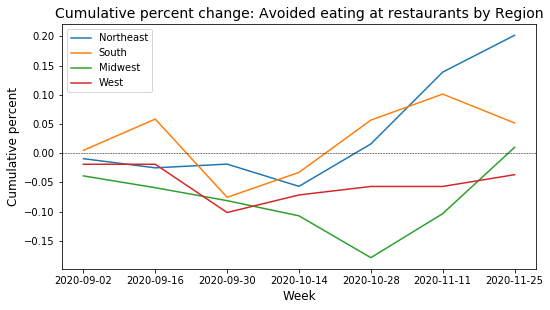

In [38]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y=temp2.columns[5], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[6], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[7], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[8], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent change: Avoided eating at restaurants by Region', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)